In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
from imblearn.over_sampling import SMOTE

In [6]:
data=pd.read_csv(r"C:\Users\lucius seneca\CampusX\Project\Credit-Score-Classification\Dataset\creditcard.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.shape

(284807, 31)

In [12]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [14]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


##### 
**Note:** The original dataset is significantly imbalanced, with the majority of transactions being non-fraudulent. If we use this data as the foundation for our predictive models, there's a risk that the models may make errors and overfit by "assuming" that most transactions are not fraudulent. However, our objective is not for the model to assume but to accurately identify patterns that indicate fraud.


## EDA

<Axes: xlabel='Class'>

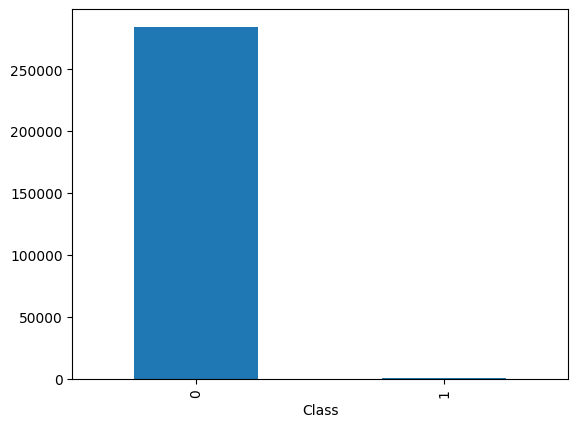

In [17]:
data['Class'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Distribution of Transaction Amount')

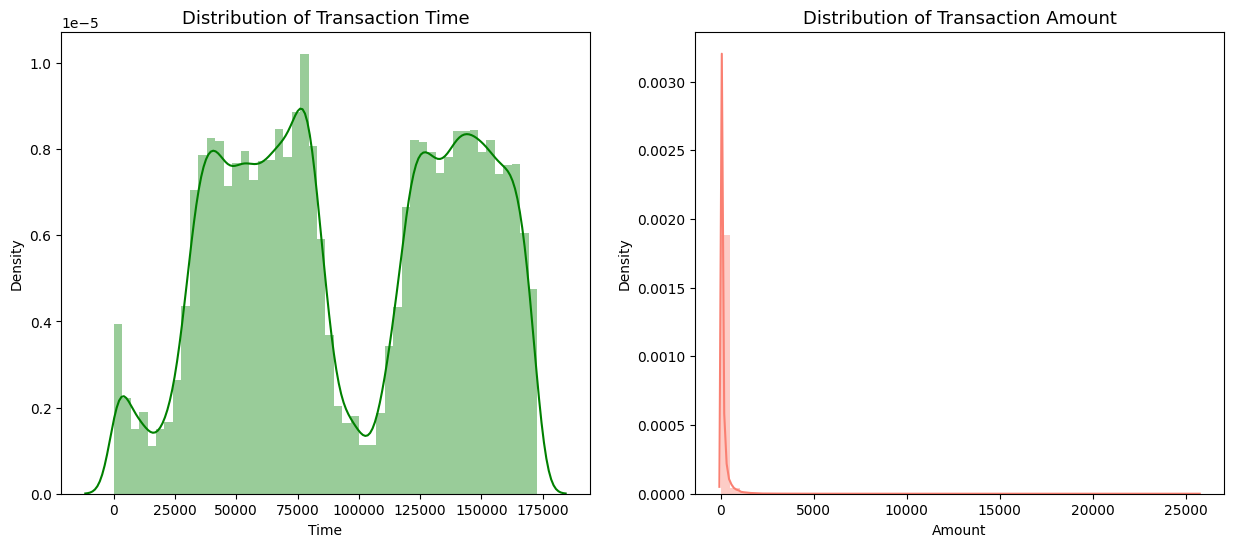

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(data['Time'], ax=ax1, color='g')
ax2 = sns.distplot(data['Amount'], ax=ax2, color='salmon')
ax1.set_title('Distribution of Transaction Time', fontsize=13)
ax2.set_title('Distribution of Transaction Amount', fontsize=13)

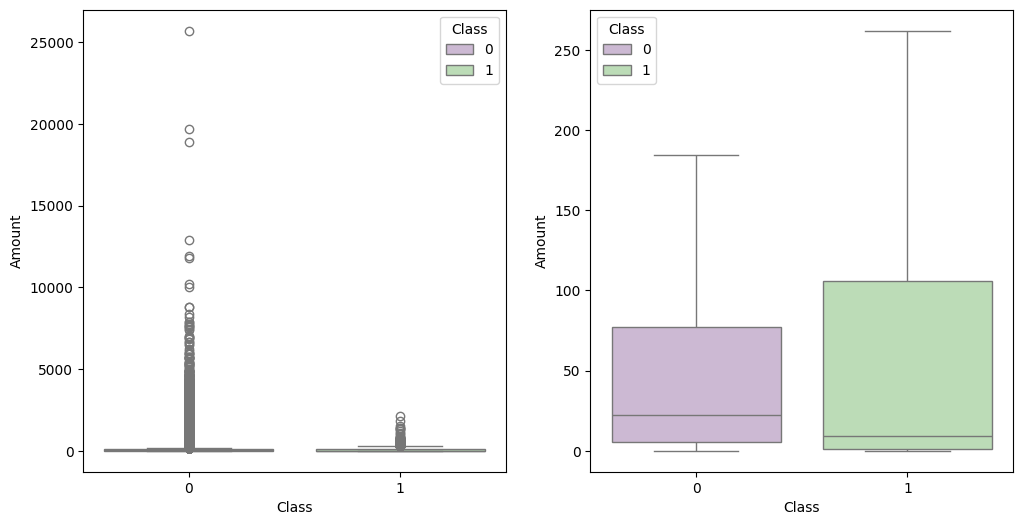

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show()

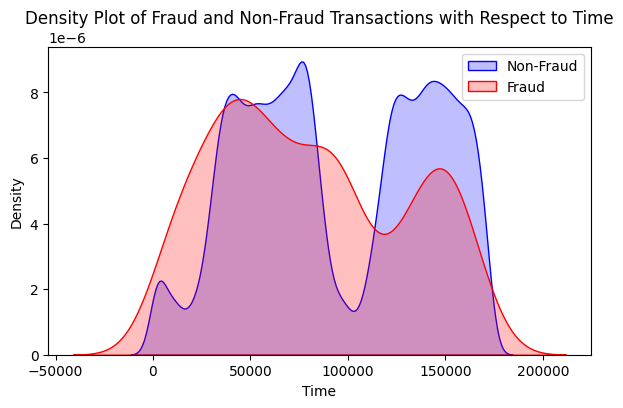

In [20]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=data[data['Class'] == 0], x='Time', label='Non-Fraud', color='blue', fill=True)
sns.kdeplot(data=data[data['Class'] == 1], x='Time', label='Fraud', color='red', fill=True)
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Density Plot of Fraud and Non-Fraud Transactions with Respect to Time')
plt.legend()
plt.show()

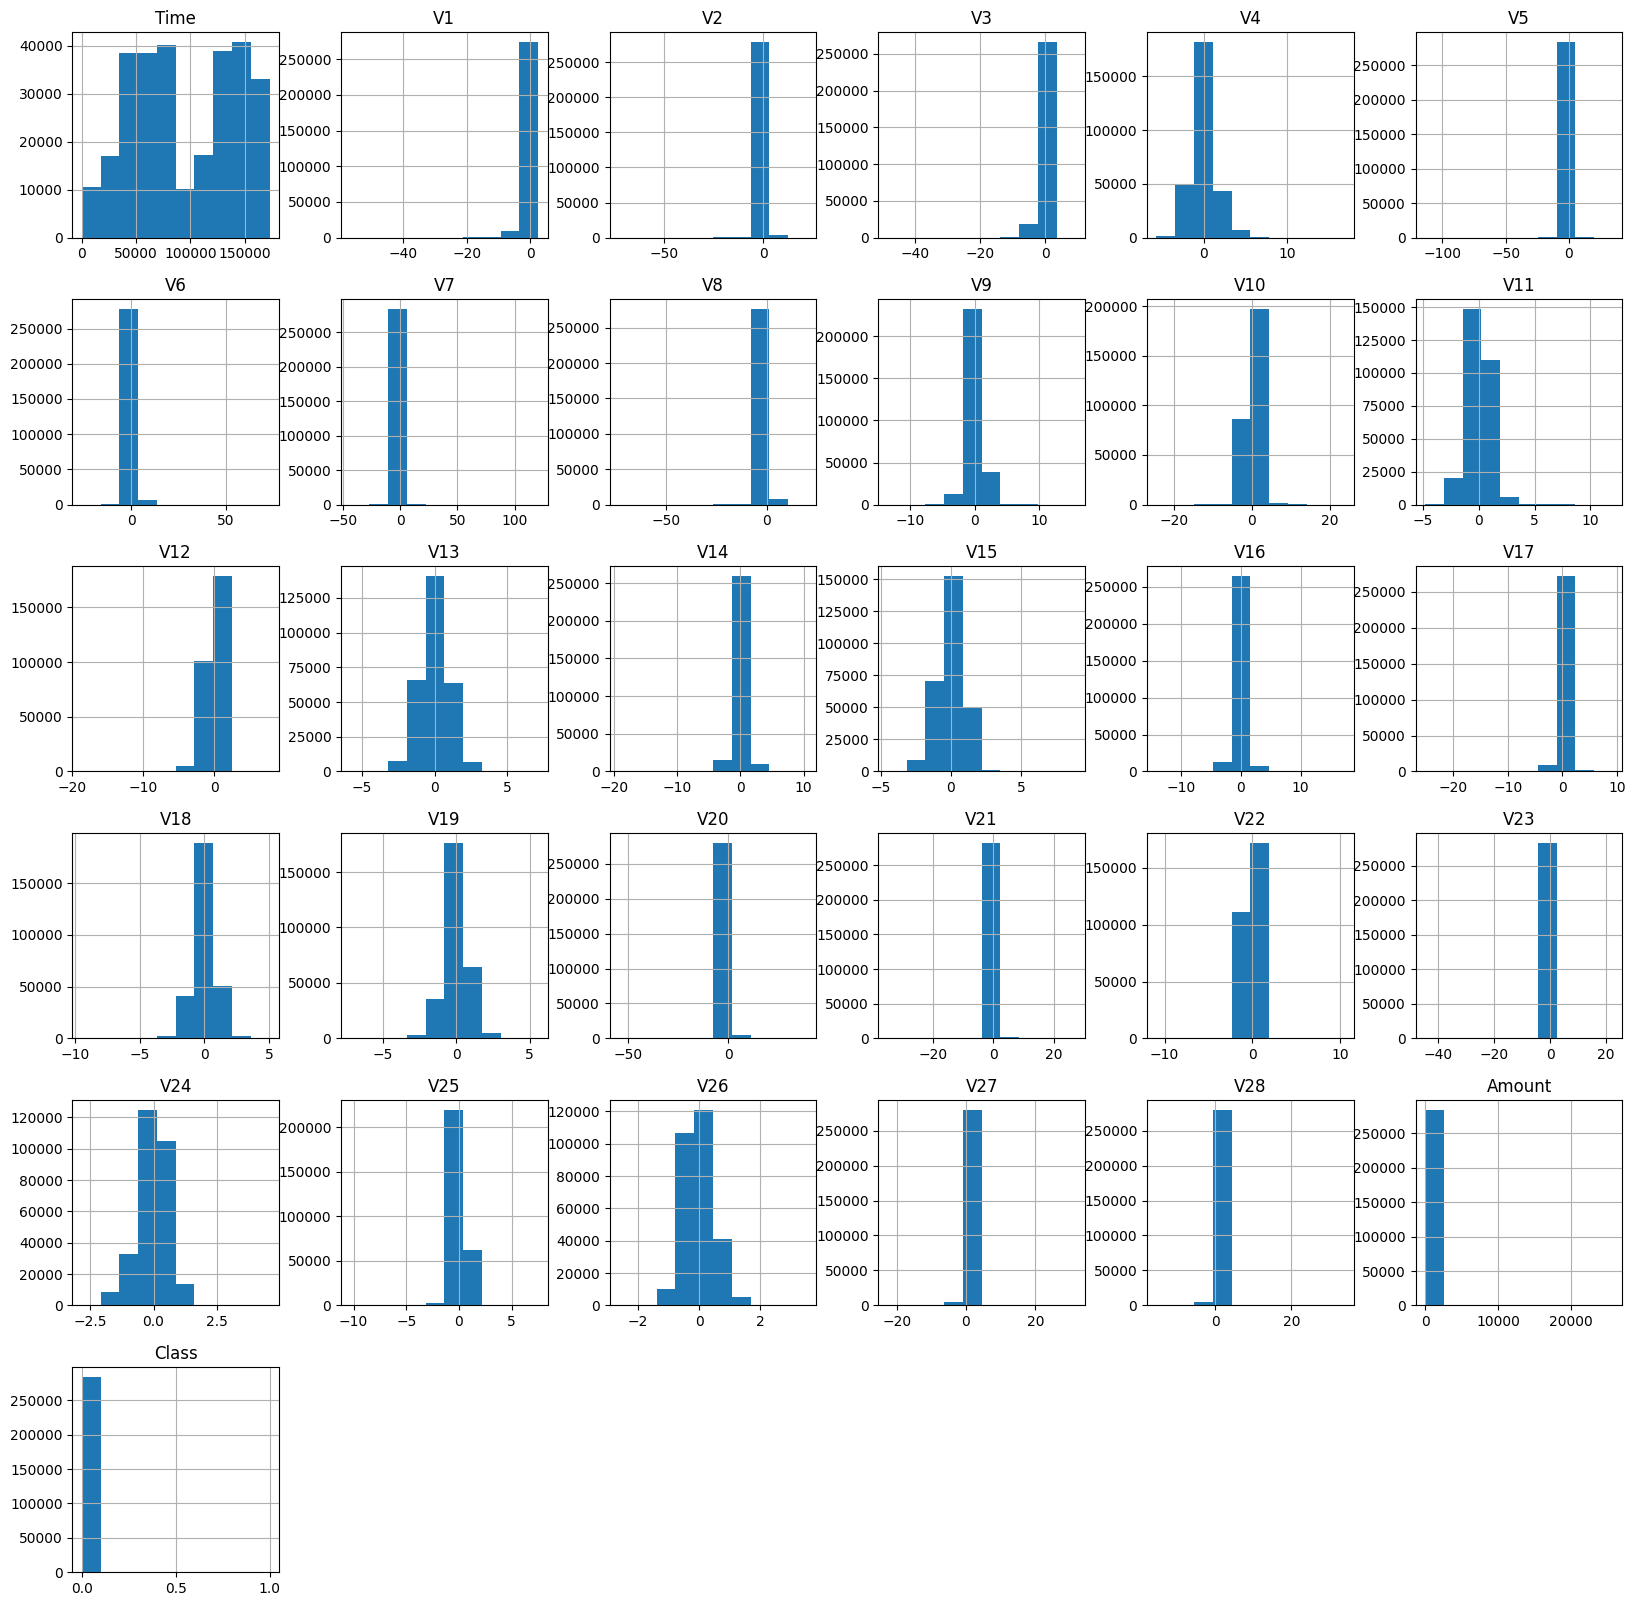

In [21]:
data.hist(figsize=(20,20))
plt.show()

<Axes: >

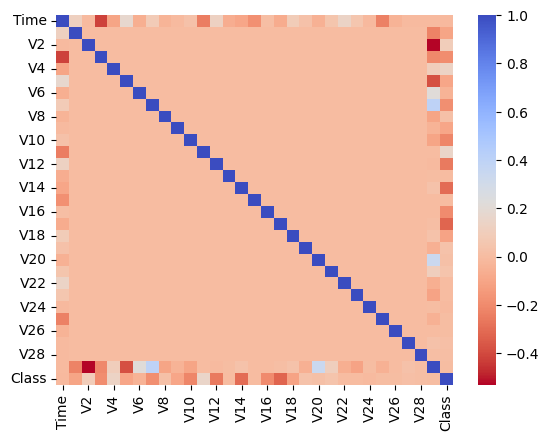

In [22]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [24]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [27]:
X = data.drop('Class', axis=1) 
y = data['Class']

smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),
                          pd.Series(y_resampled, name='Class')], 
                          axis=1)

df_resampled['Class'].value_counts()

Class
0    284315
1    142157
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# splitting training & testing data into 75% - 25% 
X = df_resampled.drop(columns = ['Class'], axis=1)
y = df_resampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<Axes: xlabel='Class'>

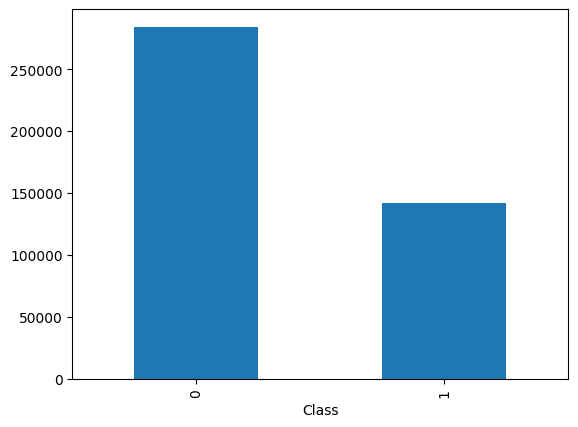

In [35]:
df_resampled["Class"].value_counts().plot(kind="bar")

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [38]:


def evaluate_model(model, X_train, X_test, y_train, y_test):
   
    model.fit(X_train, y_train)
    
    
    y_train_pred = model.predict(X_train)
    
    
    y_test_pred = model.predict(X_test)
    
   
    print("Training Data Evaluation:")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    

    print("\nTest Data Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))




In [39]:
lr=LogisticRegression()

In [40]:
evaluate_model(lr,X_train, X_test, y_train, y_test)

Training Data Evaluation:
Accuracy: 0.9579089209451812
Precision: 0.9585981903206762
Recall: 0.9579089209451812
F1 Score: 0.9574337669281152
Confusion Matrix:
 [[211019   2391]
 [ 11072  95372]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    213410
           1       0.98      0.90      0.93    106444

    accuracy                           0.96    319854
   macro avg       0.96      0.94      0.95    319854
weighted avg       0.96      0.96      0.96    319854


Test Data Evaluation:
Accuracy: 0.9585435855108894
Precision: 0.9592288150228311
Recall: 0.9585435855108894
F1 Score: 0.9580891056285852
Confusion Matrix:
 [[70124   781]
 [ 3639 32074]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     70905
           1       0.98      0.90      0.94     35713

    accuracy                           0.96    106618
   macro avg       0.96 

In [41]:
dtc=DecisionTreeClassifier()
evaluate_model(dtc,X_train, X_test, y_train, y_test)

Training Data Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[213410      0]
 [     0 106444]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213410
           1       1.00      1.00      1.00    106444

    accuracy                           1.00    319854
   macro avg       1.00      1.00      1.00    319854
weighted avg       1.00      1.00      1.00    319854


Test Data Evaluation:
Accuracy: 0.9971299405353693
Precision: 0.9971329974711528
Recall: 0.9971299405353693
F1 Score: 0.997130775676672
Confusion Matrix:
 [[70710   195]
 [  111 35602]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70905
           1       0.99      1.00      1.00     35713

    accuracy                           1.00    106618
   macro avg       1.00      1.00      1.00    106618
weighted avg       1.00      1.

In [43]:
rfc=RandomForestClassifier(n_jobs=-1)
evaluate_model(rfc,X_train, X_test, y_train, y_test)

Training Data Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[213410      0]
 [     0 106444]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213410
           1       1.00      1.00      1.00    106444

    accuracy                           1.00    319854
   macro avg       1.00      1.00      1.00    319854
weighted avg       1.00      1.00      1.00    319854


Test Data Evaluation:
Accuracy: 0.9998593108105573
Precision: 0.9998593568717433
Recall: 0.9998593108105573
F1 Score: 0.9998593171621868
Confusion Matrix:
 [[70891    14]
 [    1 35712]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70905
           1       1.00      1.00      1.00     35713

    accuracy                           1.00    106618
   macro avg       1.00      1.00      1.00    106618
weighted avg       1.00      1

In [44]:
bgc=BaggingClassifier(n_jobs=-1)
evaluate_model(bgc,X_train, X_test, y_train, y_test)

Training Data Evaluation:
Accuracy: 0.999946850750655
Precision: 0.9999468505733244
Recall: 0.999946850750655
F1 Score: 0.9999468505629467
Confusion Matrix:
 [[213403      7]
 [    10 106434]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213410
           1       1.00      1.00      1.00    106444

    accuracy                           1.00    319854
   macro avg       1.00      1.00      1.00    319854
weighted avg       1.00      1.00      1.00    319854


Test Data Evaluation:
Accuracy: 0.9988369693672738
Precision: 0.9988368923843215
Recall: 0.9988369693672738
F1 Score: 0.9988368642087445
Confusion Matrix:
 [[70856    49]
 [   75 35638]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70905
           1       1.00      1.00      1.00     35713

    accuracy                           1.00    106618
   macro avg       1.00   